Text(0, 0.5, 'Amplitude')

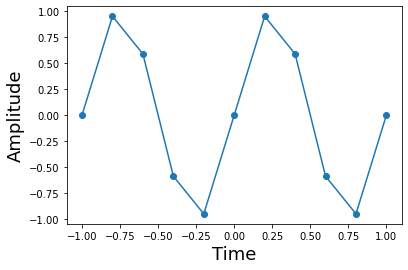

In [7]:
from __future__ import  division
from matplotlib.patches import FancyArrow
import mpl_toolkits.mplot3d.art3d as art3d
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.gridspec as gridspec
import numpy as np
import matplotlib.pyplot as plt

fig,ax = plt.subplots()
f = 1.0 # Hz, signal frequency
fs = 5.0 # Hz, sampling rate (ie. >= 2*f)
t = np.arange(-1,1+1/fs,1/fs) # sample interval, symmetric
# for convenience later
x = np.sin(2*np.pi*f*t)
ax.plot(t,x,'o-')
ax.set_xlabel('Time',fontsize=18)
ax.set_ylabel('Amplitude',fontsize=18)

Text(0, 0.5, 'Amplitude')

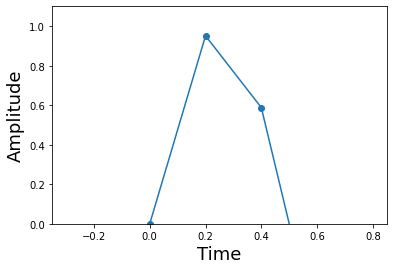

In [8]:
import matplotlib.pyplot as plt
import numpy as np 
import math

fig, ax = plt.subplots()
ax.plot(t,x,'o-')
ax.axis(xmin = 1/(4*f)-1/fs*3,
xmax = 1/(4*f)+1/fs*3,
ymin = 0,
ymax = 1.1 )
ax.set_xlabel('Time',fontsize=18)
ax.set_ylabel('Amplitude',fontsize=18)

In [9]:
from __future__ import  division
from matplotlib.patches import FancyArrow
import mpl_toolkits.mplot3d.art3d as art3d
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.gridspec as gridspec
import numpy as np
import matplotlib.pyplot as plt

interval=[] # piecewise domains
apprx = [] # line on domains
# build up points *evenly* inside of intervals
tp = np.hstack([np.linspace(t[i],t[i+1],20,False) for i in range(len(t)-1)])
# construct arguments for piecewise
for i in range(len(t)-1):
    interval.append(np.logical_and(t[i] <= tp,tp < t[i+1]))
    apprx.append((x[i+1]-x[i])/(t[i+1]-t[i])*(tp[interval[-1]]-t[i]) + x[i])
x_hat = np.piecewise(tp,interval,apprx) # piecewise linear approximation

Text(0.5, 1.0, 'Errors with Piecewise Linear Interpolant')

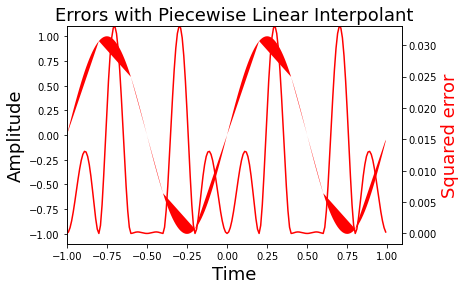

In [10]:
from __future__ import division
import matplotlib.pyplot as plt
import numpy as np

fig,ax1= plt.subplots()
# fill in the difference between the interpolant and the sine
ax1.fill_between(tp,x_hat,np.sin(2*np.pi*f*tp),facecolor='red')
ax1.set_xlabel('Time',fontsize=18)
ax1.set_ylabel('Amplitude',fontsize=18)
ax2 = ax1.twinx() # create clone of ax1
sqe = (x_hat-np.sin(2*np.pi*f*tp))**2 #compute squared-error
ax2.plot(tp, sqe,'r')
ax2.axis(xmin=-1,ymax= sqe.max() )
ax2.set_ylabel('Squared error', color='r',fontsize=18)
ax1.set_title('Errors with Piecewise Linear Interpolant',fontsize=18)

Text(0.5, 1.0, 'Sampling Rate=5.00 Hz')

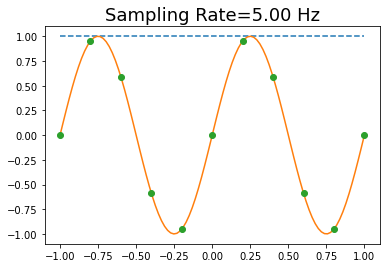

In [11]:
from __future__ import  division
from matplotlib.patches import FancyArrow
import mpl_toolkits.mplot3d.art3d as art3d
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.gridspec as gridspec
import numpy as np
import matplotlib.pyplot as plt

fig,ax= plt.subplots()
t = np.linspace(-1,1,100) # redefine this here for convenience
ts = np.arange(-1,1+1/fs,1/fs) # sample points
num_coeffs=len(ts)
sm=0
for k in range(-num_coeffs,num_coeffs): # since function is real, need both sum
    sm=1 + (np.sin(2*np.pi*(k/fs))*np.sinc(k - fs*t))
ax.plot(t,sm,'--',t,np.sin(2*np.pi*t),ts, np.sin(2*np.pi*ts),'o')
ax.set_title('Sampling Rate=%3.2f Hz' % fs, fontsize=18 )

Text(0.5, 1.0, 'Errors with Whittaker Interpolant')

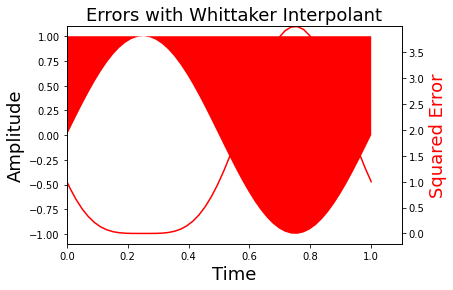

In [12]:
fig,ax1=plt.subplots()
ax1.fill_between(t,sm,np.sin(2*np.pi*f*t),facecolor='red')
ax1.set_ylabel('Amplitude',fontsize=18)
ax1.set_xlabel('Time',fontsize=18)
ax2 = ax1.twinx()
sqe = (sm - np.sin(2*np.pi*f*t))**2
ax2.plot(t, sqe,'r')
ax2.axis(xmin=0,ymax = sqe.max())
ax2.set_ylabel('Squared Error', color='r',fontsize=18)
ax1.set_title(r'Errors with Whittaker Interpolant',fontsize=18)

Text(-0.9, 0.5, 'no interference here')

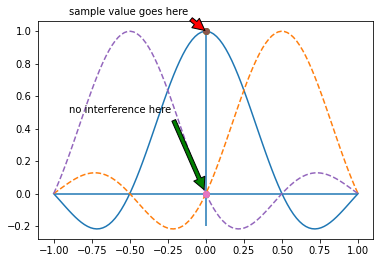

In [13]:
fig,ax=plt.subplots()
k=0
fs=2 # makes this plot easier to read
ax.plot(t,np.sinc(k - fs * t),
        t,np.sinc(k+1 - fs * t),'--',k/fs,1,'o',(k)/fs,0,'o',
        t,np.sinc(k-1 - fs * t),'--',k/fs,1,'o',(-k)/fs,0,'o',)

ax.hlines(0,-1,1) # horizontal lines
ax.vlines(0,-.2,1) # vertical lines
ax.annotate('sample value goes here',
            xy=(0,1), # arrowhead position
            xytext=(-1+.1,1.1),# text position
            arrowprops={'facecolor':'red',
             'shrink':0.05},)

ax.annotate('no interference here', xy=(0,0),
            xytext=(-1+.1,0.5),
            arrowprops={'facecolor':'green','shrink':0.05},
           )

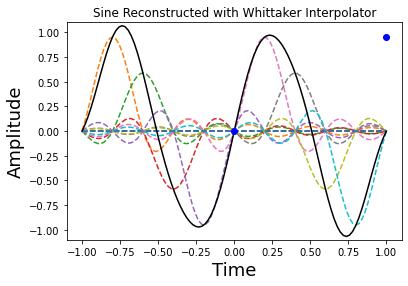

In [14]:
fs=5.0 # sampling rate
k=np.array(sorted(set((t*fs).astype(int)))) # sorted coefficient list
fig,ax = plt.subplots()
ax.plot(t,(np.sin(2*np.pi*(k[:,None]/fs))*np.sinc(k[:,None]-fs*t)).T,'--', # individual whittaker functions 
        t,(np.sin(2*np.pi*(k[:,None]/fs))*np.sinc(k[:,None]-fs*t)).
    sum(axis=0),'k-', # whittaker interpolant k/fs,
    np.sin(2*np.pi*k/fs),'ob')# samples
ax.set_xlabel('Time',fontsize=18)
ax.set_ylabel('Amplitude',fontsize=18)
ax.set_title('Sine Reconstructed with Whittaker Interpolator')
ax.axis((-1.1,1.1,-1.1,1.1));

Text(3.1, 0.5, '... and going...')

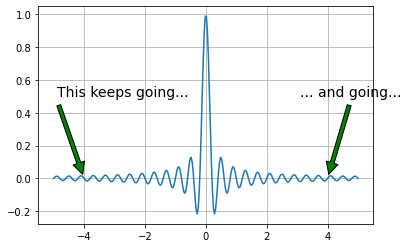

In [15]:
t = np.linspace(-5,5,300) # redefine this here for convenience
fig,ax = plt.subplots()

fs=5.0 # sampling rate
ax.plot(t,np.sinc(fs * t))
ax.grid() # put grid on axes
ax.annotate('This keeps going...',
    xy=(-4,0),
    xytext=(-5+.1,0.5),
    arrowprops={'facecolor':'green',
    'shrink':0.05},
    fontsize=14)
ax.annotate('... and going...',
    xy=(4,0),
    xytext=(3+.1,0.5),
    arrowprops={'facecolor':'green',
    'shrink':0.05},
    fontsize=14)

In [16]:
import scipy as sci
from numpy import linalg as LA

def kernel(x,sigma=1):
    'convenient function to compute kernel of eigenvalue problem'
    x = np.asanyarray(x) # ensure x is array
    y = np.pi*np.where(x == 0,1.0e-20, x)# avoid divide by zero
    return np.sin(sigma/2*y)/y

nstep=100 # quick and dirty integral quantization
t = np.linspace(-1,1,nstep) # quantization of time
dt = np.diff(t)[0] # differential step size
def eigv(sigma):
    return LA.eigvalsh(kernel(t-t[:,None],sigma)).max() # compute max eigenvalue

sigma = np.linspace(0.01,4,15) # range of time-bandwidth products to consider

fig,ax = plt.subplots()
ax.plot(sigma, dt*np.array([eigv(i) for i in sigma]),'-o')
ax.set_xlabel('Time-bandwidth product $\sigma$',fontsize=18)
ax.set_ylabel('Maximum Eigenvalue',fontsize=18)
ax.axis(ymax=1.01)
ax.grid()

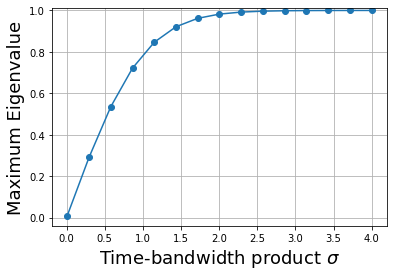

Text(0.5, 1.0, 'Eigenvalue=0.9990;$\\sigma$=3.00')

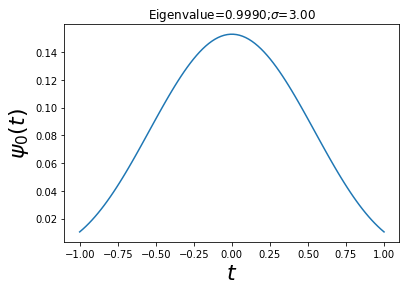

In [17]:
sigma=3 # time-bandwidth product
w,v=LA.eigh(kernel(t-t[:,None],sigma)) # eigen-system
maxv=v[:, w.argmax()] # eigenfunction for max eigenvalue
fig,ax=plt.subplots()
ax.plot(t,maxv)
ax.set_xlabel('$t$',fontsize=22)
ax.set_ylabel('$\psi_0(t)$',fontsize=22)
ax.set_title('Eigenvalue=%3.4f;$\sigma$=%3.2f'%(w.max()*dt,sigma))

Text(0.5, 1.0, '$\\sigma=5$')

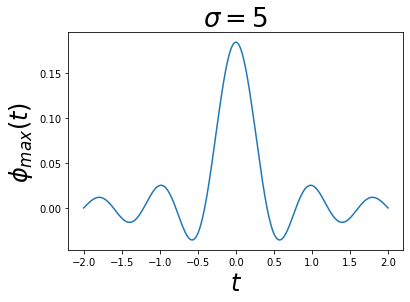

In [18]:
import numpy as geek
def kernel_tau(x,W=1):
    'convenient function to compute kernel of eigenvalue problem'
    x = np.asanyarray(x)
    y = np.pi*np.where(x == 0,1.0e-20, x) # avoid divide by zero
    return np.sin(2*W*y)/y

nstep=300 # quick and dirty integral quantization
t = np.linspace(-1,1,nstep) # quantization of time
tt = np.linspace(-2,2,nstep)# extend interval
sigma = 5
W = sigma/2./2./t.max()
w,v=LA.eig(kernel_tau(t-tt[:,None],W)) # compute e-vectors/e-values
maxv=v[:,w.real.argmax()].real # take real part

fig,ax = plt.subplots()
ax.plot(tt,maxv/np.sign(maxv[nstep//2])) # normalize for orientation
ax.set_xlabel('$t$',fontsize=24)
ax.set_ylabel(r'$\phi_{max}(t)$',fontsize=24)
ax.set_title('$\sigma=%d$'%(2*W*2*t.max()),fontsize=26)